In [23]:
# libraries
import pandas as pd 
import numpy as np 
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [4]:
# Load data
test = pd.read_csv("../../Data/test.csv")
train = pd.read_csv("../../Data/train.csv")
sample = pd.read_csv("../../Data/sample_submission.csv")
print(test.shape)
print(train.shape)

(1459, 80)
(1460, 81)


In [5]:
# deal with missing values, can alter this later (Copied from Trevor)

def na_clean(df):
    # some vars are just too missing so I remove the field
    df = df.drop(columns = ["FireplaceQu", "PoolQC", "MiscFeature"])

    # replace some numeric vars w/ median
    median_replace_vars = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']
    for var in median_replace_vars:
        df[var].fillna(df[var].median(), inplace = True)
    
    # replace some num vars w/ 0
    zero_replace_vars = ['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']
    for var in zero_replace_vars:
        df[var].fillna(0, inplace = True)
    
    # replace some cat vars w/ most freq value 
    df['MasVnrType'].fillna('None', inplace = True)
    df['Electrical'].fillna('SBrkr', inplace = True)
    df['MSZoning'].fillna('RL', inplace = True)
    df['SaleType'].fillna('WD', inplace = True)
    df['Utilities'].fillna('AllPub', inplace = True)
    df['KitchenQual'].fillna('TA', inplace = True)
    df['Functional'].fillna('Typ', inplace = True)

    # other cat vars just put missing if there isn't a glaring most popular category
    replace_missing_vars = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
        'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence', 'Exterior1st', 
        'Exterior2nd']
    for var in replace_missing_vars:
        df[var].fillna("Missing", inplace = True)

    return df

train = na_clean(train)
test = na_clean(test)

## 1st Attempt

In [4]:
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

<AxesSubplot:>

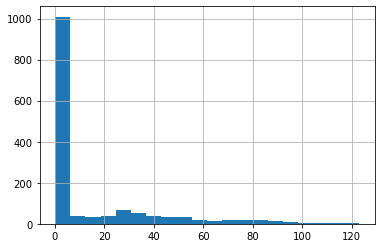

In [6]:
# Most houses are not remodelled, plan to use year remodelled as feature and whether or not remodelled as feature.
(train.YearRemodAdd-train.YearBuilt).hist(bins= 20)

In [7]:
train['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [8]:
train['2ndFlrSF'].value_counts()

0       829
728      10
504       9
672       8
546       8
       ... 
788       1
1116      1
1112      1
1111      1
1872      1
Name: 2ndFlrSF, Length: 417, dtype: int64

<AxesSubplot:>

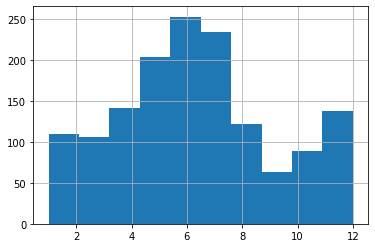

In [9]:
train.MoSold.hist()

In [10]:
train2 = train[['Id', 'LotArea', 'Street', 'Neighborhood', 'OverallQual', 'OverallCond','YearBuilt', 'YearRemodAdd', 
              'BsmtCond', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
             'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'YrSold', 'MoSold']]

In [11]:
test2 = test[['Id', 'LotArea', 'Street', 'Neighborhood', 'OverallQual', 'OverallCond','YearBuilt', 'YearRemodAdd', 
              'BsmtCond', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
             'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'YrSold', 'MoSold']]

In [12]:
train2.head()

,Id,LotArea,Street,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtCond,1stFlrSF,...,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,YrSold,MoSold
0,1,8450,Pave,CollgCr,7,5,2003,2003,TA,856,...,1,0,2,1,3,1,Gd,8,2008,2
1,2,9600,Pave,Veenker,6,8,1976,1976,TA,1262,...,0,1,2,0,3,1,TA,6,2007,5
2,3,11250,Pave,CollgCr,7,5,2001,2002,TA,920,...,1,0,2,1,3,1,Gd,6,2008,9
3,4,9550,Pave,Crawfor,7,5,1915,1970,Gd,961,...,1,0,1,0,3,1,Gd,7,2006,2
4,5,14260,Pave,NoRidge,8,5,2000,2000,TA,1145,...,1,0,2,1,4,1,Gd,9,2008,12


In [13]:
# Adding remodelled indicator
train3 = train2.copy()
train3['Remodeled'] = (train3.YearRemodAdd-train3.YearBuilt) == 0
train3.drop(columns = ['YearBuilt'], inplace = True)

In [14]:
# Adding remodelled indicator
test3 = test2.copy()
test3['Remodeled'] = (test3.YearRemodAdd-test3.YearBuilt) == 0
test3.drop(columns = ['YearBuilt'], inplace = True)

In [15]:
train3.head()

,Id,LotArea,Street,Neighborhood,OverallQual,OverallCond,YearRemodAdd,BsmtCond,1stFlrSF,2ndFlrSF,...,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,YrSold,MoSold,Remodeled
0,1,8450,Pave,CollgCr,7,5,2003,TA,856,854,...,0,2,1,3,1,Gd,8,2008,2,True
1,2,9600,Pave,Veenker,6,8,1976,TA,1262,0,...,1,2,0,3,1,TA,6,2007,5,True
2,3,11250,Pave,CollgCr,7,5,2002,TA,920,866,...,0,2,1,3,1,Gd,6,2008,9,False
3,4,9550,Pave,Crawfor,7,5,1970,Gd,961,756,...,0,1,0,3,1,Gd,7,2006,2,False
4,5,14260,Pave,NoRidge,8,5,2000,TA,1145,1053,...,0,2,1,4,1,Gd,9,2008,12,True


In [16]:
# Add 1st and 2nd floor area
train4 = train3.copy()
train4['Total_Inside_Area'] = train4['1stFlrSF'] + train4['2ndFlrSF']
train4.drop(columns = ['1stFlrSF', '2ndFlrSF', 'GrLivArea'], inplace = True)
train4.head()

,Id,LotArea,Street,Neighborhood,OverallQual,OverallCond,YearRemodAdd,BsmtCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,YrSold,MoSold,Remodeled,Total_Inside_Area
0,1,8450,Pave,CollgCr,7,5,2003,TA,1,0,2,1,3,1,Gd,8,2008,2,True,1710
1,2,9600,Pave,Veenker,6,8,1976,TA,0,1,2,0,3,1,TA,6,2007,5,True,1262
2,3,11250,Pave,CollgCr,7,5,2002,TA,1,0,2,1,3,1,Gd,6,2008,9,False,1786
3,4,9550,Pave,Crawfor,7,5,1970,Gd,1,0,1,0,3,1,Gd,7,2006,2,False,1717
4,5,14260,Pave,NoRidge,8,5,2000,TA,1,0,2,1,4,1,Gd,9,2008,12,True,2198


In [17]:
# Add 1st and 2nd floor area
test4 = test3.copy()
test4['Total_Inside_Area'] = test4['1stFlrSF'] + test4['2ndFlrSF']
test4.drop(columns = ['1stFlrSF', '2ndFlrSF', 'GrLivArea'], inplace = True)
test4.head()

,Id,LotArea,Street,Neighborhood,OverallQual,OverallCond,YearRemodAdd,BsmtCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,YrSold,MoSold,Remodeled,Total_Inside_Area
0,1461,11622,Pave,NAmes,5,6,1961,TA,0.0,0.0,1,0,2,1,TA,5,2010,6,True,896
1,1462,14267,Pave,NAmes,6,6,1958,TA,0.0,0.0,1,1,3,1,Gd,6,2010,6,True,1329
2,1463,13830,Pave,Gilbert,5,5,1998,TA,0.0,0.0,2,1,3,1,TA,6,2010,3,False,1629
3,1464,9978,Pave,Gilbert,6,6,1998,TA,0.0,0.0,2,1,3,1,Gd,7,2010,6,True,1604
4,1465,5005,Pave,StoneBr,8,5,1992,TA,0.0,0.0,2,0,2,1,Gd,5,2010,1,True,1280


In [18]:
# Add bathrooms
train5 = train4.copy()
train5['Bathrooms'] = train5.BsmtFullBath + 0.5*train5.BsmtHalfBath + train5.FullBath + 0.5*train5.HalfBath
train5.drop(columns = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], inplace = True)
train5.head()

,Id,LotArea,Street,Neighborhood,OverallQual,OverallCond,YearRemodAdd,BsmtCond,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,YrSold,MoSold,Remodeled,Total_Inside_Area,Bathrooms
0,1,8450,Pave,CollgCr,7,5,2003,TA,3,1,Gd,8,2008,2,True,1710,3.5
1,2,9600,Pave,Veenker,6,8,1976,TA,3,1,TA,6,2007,5,True,1262,2.5
2,3,11250,Pave,CollgCr,7,5,2002,TA,3,1,Gd,6,2008,9,False,1786,3.5
3,4,9550,Pave,Crawfor,7,5,1970,Gd,3,1,Gd,7,2006,2,False,1717,2.0
4,5,14260,Pave,NoRidge,8,5,2000,TA,4,1,Gd,9,2008,12,True,2198,3.5


In [19]:
test5 = test4.copy()
test5['Bathrooms'] = test5.BsmtFullBath + 0.5*test5.BsmtHalfBath + test5.FullBath + 0.5*test5.HalfBath
test5.drop(columns = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], inplace = True)
test5.head()

,Id,LotArea,Street,Neighborhood,OverallQual,OverallCond,YearRemodAdd,BsmtCond,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,YrSold,MoSold,Remodeled,Total_Inside_Area,Bathrooms
0,1461,11622,Pave,NAmes,5,6,1961,TA,2,1,TA,5,2010,6,True,896,1.0
1,1462,14267,Pave,NAmes,6,6,1958,TA,3,1,Gd,6,2010,6,True,1329,1.5
2,1463,13830,Pave,Gilbert,5,5,1998,TA,3,1,TA,6,2010,3,False,1629,2.5
3,1464,9978,Pave,Gilbert,6,6,1998,TA,3,1,Gd,7,2010,6,True,1604,2.5
4,1465,5005,Pave,StoneBr,8,5,1992,TA,2,1,Gd,5,2010,1,True,1280,2.0


In [20]:
train6 = train5.copy()
train6 = pd.get_dummies(train6, columns = ['Street', 'Neighborhood', 'OverallQual', 'OverallCond', 'BsmtCond',
                                           'KitchenQual'], drop_first=True)
train6.head()

,Id,LotArea,YearRemodAdd,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,YrSold,MoSold,Remodeled,Total_Inside_Area,...,OverallCond_7,OverallCond_8,OverallCond_9,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Po,BsmtCond_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,1,8450,2003,3,1,8,2008,2,True,1710,...,0,0,0,0,0,0,1,0,1,0
1,2,9600,1976,3,1,6,2007,5,True,1262,...,0,1,0,0,0,0,1,0,0,1
2,3,11250,2002,3,1,6,2008,9,False,1786,...,0,0,0,0,0,0,1,0,1,0
3,4,9550,1970,3,1,7,2006,2,False,1717,...,0,0,0,1,0,0,0,0,1,0
4,5,14260,2000,4,1,9,2008,12,True,2198,...,0,0,0,0,0,0,1,0,1,0


In [21]:
test6 = test5.copy()
test6 = pd.get_dummies(test6, columns = ['Street', 'Neighborhood', 'OverallQual', 'OverallCond', 'BsmtCond',
                                           'KitchenQual'], drop_first=True)
test6.head()

,Id,LotArea,YearRemodAdd,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,YrSold,MoSold,Remodeled,Total_Inside_Area,...,OverallCond_7,OverallCond_8,OverallCond_9,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Po,BsmtCond_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,1461,11622,1961,2,1,5,2010,6,True,896,...,0,0,0,0,0,0,1,0,0,1
1,1462,14267,1958,3,1,6,2010,6,True,1329,...,0,0,0,0,0,0,1,0,1,0
2,1463,13830,1998,3,1,6,2010,3,False,1629,...,0,0,0,0,0,0,1,0,0,1
3,1464,9978,1998,3,1,7,2010,6,True,1604,...,0,0,0,0,0,0,1,0,1,0
4,1465,5005,1992,2,1,5,2010,1,True,1280,...,0,0,0,0,0,0,1,0,1,0


### Model features

In [22]:
X_train = train6.copy()
X_train = X_train.drop(columns = ['Id'])
X_train.head()
X_train.columns

Index(['LotArea', 'YearRemodAdd', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'YrSold', 'MoSold', 'Remodeled', 'Total_Inside_Area',
       'Bathrooms', 'Street_Pave', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'OverallQual_2',
       'OverallQual_3', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6',
       'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10',
       'OverallCond_2', 'Overal

In [23]:
X_test = test6.copy()
X_test = X_test.drop(columns = ['Id'])
X_test.head()
X_test.shape


(1459, 59)

In [25]:
Y_train = train.SalePrice
Y_train.shape


(1460,)

In [26]:
Y_test = sample.SalePrice
Y_test.shape

(1459,)

### Model with Lot area, year remodelled, number of bedrooms, kitchen, year and month sold, remodeled indicator, total inside area, total number of bathrooms, dummies for neighborhood, overall condition, overall quality, basement and kitchen quality

In [27]:
# Decent R2
from sklearn.linear_model import LinearRegression
lr_1 = LinearRegression(fit_intercept=True)
lr_1.fit(X_train,Y_train)
lr_1.score(X_train,Y_train)

0.8499854578949784

In [28]:
lr_1.score(X_test ,Y_test)

-17.592672566441507

In [29]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, export_graphviz


dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, Y_train)
print('Accuracy:', dt.score(X_test, Y_test))

Accuracy: -18.977368429655467


## Actual EDA


In [9]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

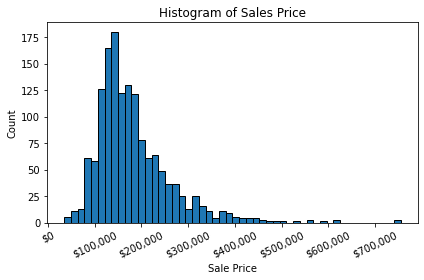

In [29]:
#Histogram for SalePrice
num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(train.SalePrice, num_bins, edgecolor = "black")


ax.set_xlabel('Sale Price')
ax.set_ylabel('Count')
ax.set_title('Histogram of Sales Price')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
plt.xticks(rotation=25)


# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

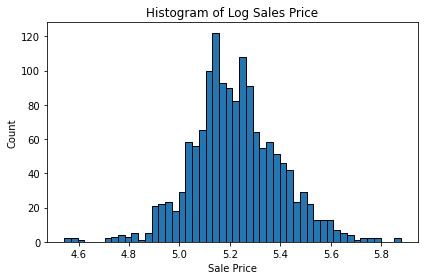

In [49]:
#Histogram for SalePrice
num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(np.log10(train.SalePrice), num_bins, edgecolor = "black")


ax.set_xlabel('Sale Price')
ax.set_ylabel('Count')
ax.set_title('Histogram of Log Sales Price')


# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [52]:
# Columns we are mainly looking at
cols = ['Id', 'LotArea', 'Street', 'Neighborhood', 'OverallQual', 'OverallCond','YearBuilt', 'YearRemodAdd', 
              'BsmtCond', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
             'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'YrSold', 'MoSold']

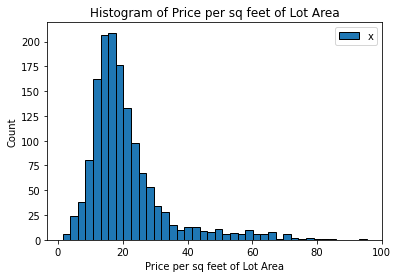

In [99]:
# Looking at price per sq feet of lot area
train.PricePerSqFeet = train.SalePrice/train.LotArea
plt.hist(train.PricePerSqFeet, bins = 40, edgecolor = "black");ax.set_xlabel('Sale Price')
plt.ylabel('Count')
plt.xlabel('Price per sq feet of Lot Area')
plt.title('Histogram of Price per sq feet of Lot Area')


#This histogram has a 

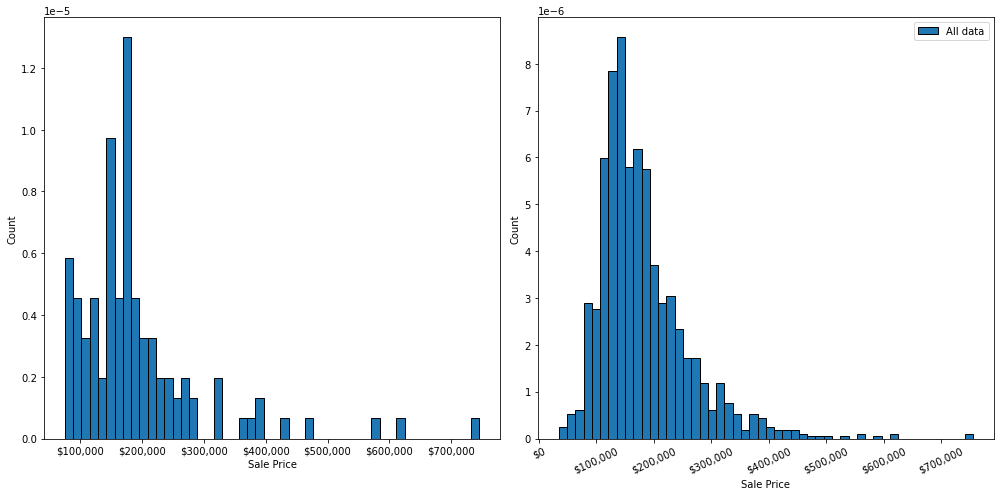

In [116]:
# Which houses have large price per sq feet
# Looks like the sales price is distributed similarly to the whole train data set
# Why do some houses have higher price per sq feet?

num_bins = 50

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (14,7))

# the histogram of the data
ax[0].hist(train[train.PricePerSqFeet>40].SalePrice, num_bins, 
                           edgecolor = "black", density = True, label = 'High Price per sq feet')
ax[1].hist(train.SalePrice, num_bins, edgecolor = "black", density = True,
                          label = 'All data')

for i in range(2):
    ax[i].set_xlabel('Sale Price')
    ax[i].set_ylabel('Count')
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax[i].xaxis.set_major_formatter(tick)
    plt.xticks(rotation=25)
    plt.legend()


# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [124]:
# There's only 4 years of data and mean price doesnt seem to vary much with year
train.groupby(['YrSold']).SalePrice.mean()

YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64

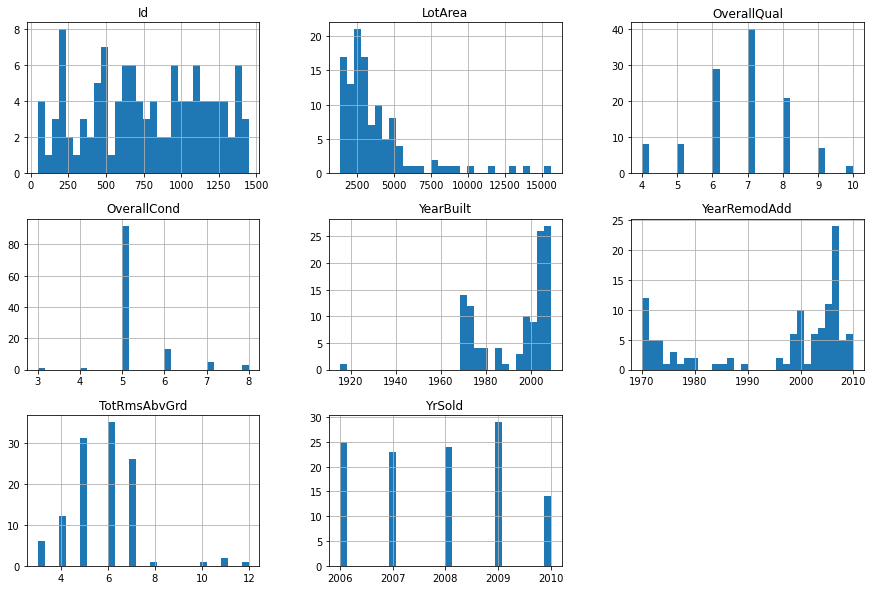

In [130]:
train[train.PricePerSqFeet>40][['Id', 'LotArea', 'Neighborhood', 'OverallQual', 
                               'OverallCond','YearBuilt', 'YearRemodAdd','TotRmsAbvGrd', 'YrSold']].hist(bins = 30, figsize = (15,10));

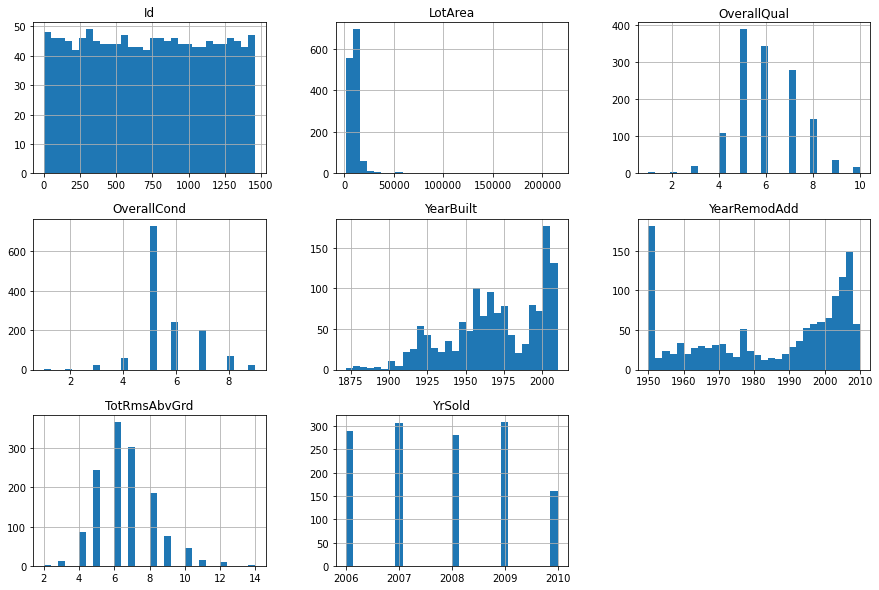

In [127]:
train[train.PricePerSqFeet<=40][['Id', 'LotArea', 'Neighborhood', 'OverallQual', 
                               'OverallCond','YearBuilt', 'YearRemodAdd','TotRmsAbvGrd', 'YrSold']].hist(bins = 5, figsize = (15,10));

In [136]:
#Looks like houses with high price per sq feet are in differnet neighborhoods than the other houses.
# Maybe we should bucket neightbourhoods into 2 groups?

#Neighborhood nouts for houses with high price per sq feet
train[train.PricePerSqFeet>40][['Neighborhood']].value_counts()

Neighborhood
Somerst         27
Blmngtn         17
BrDale          16
NridgHt         13
StoneBr         11
MeadowV         11
NPkVill          5
Edwards          4
Crawfor          3
NoRidge          2
Blueste          2
OldTown          1
NAmes            1
CollgCr          1
ClearCr          1
dtype: int64

In [140]:
#Neighborhood nouts for houses with low price per sq feet
train[train.PricePerSqFeet<=40][['Neighborhood']].value_counts()

Neighborhood
NAmes           224
CollgCr         149
OldTown         112
Edwards          96
Gilbert          79
Sawyer           74
NWAmes           73
NridgHt          64
Somerst          59
SawyerW          59
BrkSide          58
Mitchel          49
Crawfor          48
NoRidge          39
Timber           38
IDOTRR           37
ClearCr          27
SWISU            25
StoneBr          14
Veenker          11
MeadowV           6
NPkVill           4
dtype: int64

In [161]:
# Mean and std dev for price each neighborhood
pd.concat([train.groupby('Neighborhood').SalePrice.mean(), train.groupby('Neighborhood').SalePrice.std(), 
          train.groupby('Neighborhood').SalePrice.mean()/train.groupby('Neighborhood').SalePrice.std()], 
          axis = 1).set_axis(['mean Sale Price', 'Std dev of Sale price', 'Mean/Stddev'], axis = 1).sort_values(
    by = ['mean Sale Price'], ascending = False)


,mean Sale Price,Std dev of Sale price,Mean/Stddev
Neighborhood,,,
NoRidge,335295.317073,121412.658640,2.761617
NridgHt,316270.623377,96392.544954,3.281069
StoneBr,310499.000000,112969.676640,2.748516
Timber,242247.447368,64845.651549,3.735755
Veenker,238772.727273,72369.317959,3.299364
Somerst,225379.837209,56177.555888,4.011920
ClearCr,212565.428571,50231.538993,4.231712
Crawfor,210624.725490,68866.395472,3.058454
CollgCr,197965.773333,51403.666438,3.851199


In [69]:
#Looking at houses with very high Sale Price > $500,000
train[train.SalePrice>500000][cols]

,Id,LotArea,Street,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtCond,1stFlrSF,...,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,YrSold,MoSold
178,179,17423,Pave,StoneBr,9,5,2008,2009,TA,2234,...,1,0,2,0,1,1,Ex,9,2009,7
440,441,15431,Pave,NridgHt,10,5,2008,2008,TA,2402,...,1,0,2,0,2,1,Ex,10,2009,4
691,692,21535,Pave,NoRidge,10,6,1994,1995,TA,2444,...,0,1,3,1,4,1,Ex,10,2007,1
769,770,53504,Pave,StoneBr,8,5,2003,2003,TA,1690,...,1,0,3,1,4,1,Ex,12,2010,6
803,804,13891,Pave,NridgHt,9,5,2008,2009,TA,1734,...,0,0,3,1,4,1,Ex,12,2009,1
898,899,12919,Pave,NridgHt,9,5,2009,2010,TA,2364,...,1,0,2,1,2,1,Ex,11,2010,3
1046,1047,16056,Pave,StoneBr,9,5,2005,2006,TA,1992,...,0,0,3,1,4,1,Ex,11,2006,7
1169,1170,35760,Pave,NoRidge,10,5,1995,1996,TA,1831,...,1,0,3,1,4,1,Gd,10,2006,7
1182,1183,15623,Pave,NoRidge,10,5,1996,1996,TA,2411,...,1,0,3,1,4,1,Ex,10,2007,7
